https://www.notion.so/Backtest-pnl-on-events-Low-skew-CB-Pivot-ATH-88eec344ef2743cebeba7136839e7169?pvs=4

In [133]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from Scenarios import *

In [134]:
# Example usage
# Generate a sample DataFrame with placeholder data
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'IV_OTM_Put': np.random.uniform(low=0.15, high=0.3, size=100),
    'IV_ATM': np.random.uniform(low=0.1, high=0.25, size=100),
    'IV_OTM_Call': np.random.uniform(low=0.15, high=0.3, size=100)
})
df

,Date,IV_OTM_Put,IV_ATM,IV_OTM_Call
0,2023-01-01,0.222132,0.175118,0.232350
1,2023-01-02,0.271123,0.169866,0.224877
2,2023-01-03,0.228028,0.132621,0.250821
3,2023-01-04,0.217720,0.142913,0.278426
4,2023-01-05,0.161017,0.180734,0.284988
...,...,...,...,...
95,2023-04-06,0.268909,0.156272,0.220251
96,2023-04-07,0.294385,0.128389,0.289423
97,2023-04-08,0.192161,0.110278,0.209834
98,2023-04-09,0.248294,0.185102,0.229731


In [135]:
# Calculate the skew for all periods
df_with_skew = calculate_simple_skew(df)
df_with_skew

,Date,IV_OTM_Put,IV_ATM,IV_OTM_Call,Skew
0,2023-01-01,0.222132,0.175118,0.232350,-0.058353
1,2023-01-02,0.271123,0.169866,0.224877,0.272249
2,2023-01-03,0.228028,0.132621,0.250821,-0.171868
3,2023-01-04,0.217720,0.142913,0.278426,-0.424774
4,2023-01-05,0.161017,0.180734,0.284988,-0.685931
...,...,...,...,...,...
95,2023-04-06,0.268909,0.156272,0.220251,0.311370
96,2023-04-07,0.294385,0.128389,0.289423,0.038648
97,2023-04-08,0.192161,0.110278,0.209834,-0.160259
98,2023-04-09,0.248294,0.185102,0.229731,0.100281


In [136]:
# Define your skew threshold
skew_threshold = 0.2

In [137]:
# Generate a sample DataFrame with placeholder data
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=100, freq='D'),
    'IV_OTM_Put': np.random.normal(0.20, 0.05, 100),  # Placeholder data
    'IV_ATM': np.random.normal(0.18, 0.04, 100),      # Placeholder data
    'IV_OTM_Call': np.random.normal(0.22, 0.05, 100)  # Placeholder data
})

### Skew Levels

- Determine periods when the volatility skew was below the:
    - specified abolsute level: skew_threshold
    - skewness levels: 
        - percentile_level: 
        - mean_skew: 
        - std_dev_skew:
        - std_dev_level

In [138]:
# Define your skew threshold
skew_threshold = 0.2

In [139]:
# Filter for periods where skew is below the threshold
low_skew_periods = filter_for_low_skew_periods(df_with_skew, skew_threshold)
low_skew_periods.round(4).head()

,Date,IV_OTM_Put,IV_ATM,IV_OTM_Call,Skew
0,2023-01-01,0.2221,0.1751,0.2324,-0.0584
2,2023-01-03,0.2280,0.1326,0.2508,-0.1719
3,2023-01-04,0.2177,0.1429,0.2784,-0.4248
4,2023-01-05,0.1610,0.1807,0.2850,-0.6859
6,2023-01-07,0.2152,0.1235,0.2436,-0.2304


In [140]:
# Calculate the skewness levels based on the percentile and st dev threshold
skewness_levels?
skewness_levels = calculate_skewness_levels(df, 'IV_OTM_Put', 'IV_OTM_Call', 'IV_ATM')
skewness_levels

{'percentile_level': -0.037598005432034315,
 'mean_skew': 0.031691999216067364,
 'std_dev_skew': 0.0502016394436769,
 'std_dev_level': -0.018509640227609536}

In [141]:
# Sample data generation and function calls
period = 150
df = pd.DataFrame({
    'Date': pd.date_range(start='2023-01-01', periods=period, freq='D'),
    'IV_OTM_Put': np.random.uniform(0.15, 0.3, period),
    'IV_ATM': np.random.uniform(0.1, 0.25, period),
    'IV_OTM_Call': np.random.uniform(0.15, 0.3, period)
})

In [142]:
# Calculates upskew, downskew, and overall skew
spread_threshold = 0.05
ratio_threshold = 1.5

df_skews = calculate_skew(df, 'IV_OTM_Put', 'IV_OTM_Call', 'IV_ATM')
# Determination of spread and ratio between downskew and upskew.
df_ratio = calculate_spreads_and_ratios(df_skews)
# Identification of periods where the spread or ratio exceeds certain thresholds.
threshold_periods = find_threshold_periods(df, spread_threshold, ratio_threshold)
# Calculation of average and median implied volatility shifts for various time intervals after threshold conditions are met.
vol_shifts = calculate_vol_shifts(df, threshold_periods, [1, 3, 6, 9, 12])

/Users/aureliedubost/XEU4/Scenarios.py:117: RuntimeWarning: Mean of empty slice
  results[shift] = {'average': np.nanmean(vol_shifts), 'median': np.nanmedian(vol_shifts)}
/Users/aureliedubost/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1111: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [143]:
df_ratio

,Date,IV_OTM_Put,IV_ATM,IV_OTM_Call,UpSkew,DownSkew,Skew,Spread,Ratio
0,2023-01-01,0.240187,0.109279,0.233577,0.124298,-0.130907,0.060479,-0.255206,2.055220
1,2023-01-02,0.153889,0.233080,0.225096,-0.007984,0.079192,-0.305506,0.087176,0.026135
2,2023-01-03,0.172907,0.154906,0.215896,0.060990,-0.018002,-0.277516,-0.078992,-0.219772
3,2023-01-04,0.199588,0.127068,0.155046,0.027978,-0.072520,0.350534,-0.100498,0.079817
4,2023-01-05,0.203847,0.231709,0.195660,-0.036049,0.027862,0.035336,0.063911,-1.020190
...,...,...,...,...,...,...,...,...,...
145,2023-05-26,0.151584,0.150128,0.180700,0.030573,-0.001456,-0.193944,-0.032029,-0.157637
146,2023-05-27,0.154830,0.209616,0.213204,0.003589,0.054786,-0.278484,0.051197,-0.012886
147,2023-05-28,0.182260,0.177766,0.256756,0.078990,-0.004494,-0.419070,-0.083483,-0.188489
148,2023-05-29,0.255384,0.187301,0.188325,0.001024,-0.068083,0.358030,-0.069107,0.002860


In [144]:
threshold_periods

,Date,IV_OTM_Put,IV_ATM,IV_OTM_Call,UpSkew,DownSkew,Skew,Spread,Ratio
0,2023-01-01,0.240187,0.109279,0.233577,0.124298,-0.130907,0.060479,-0.255206,2.055220
1,2023-01-02,0.153889,0.233080,0.225096,-0.007984,0.079192,-0.305506,0.087176,0.026135
4,2023-01-05,0.203847,0.231709,0.195660,-0.036049,0.027862,0.035336,0.063911,-1.020190
20,2023-01-21,0.212692,0.244335,0.183204,-0.061131,0.031642,0.120689,0.092773,-0.506515
30,2023-01-31,0.238728,0.190184,0.238282,0.048098,-0.048545,0.002348,-0.096643,20.483753
33,2023-02-03,0.188222,0.244116,0.175688,-0.068428,0.055895,0.051344,0.124323,-1.332750
34,2023-02-04,0.199713,0.233783,0.156029,-0.077754,0.034070,0.186855,0.111824,-0.416117
49,2023-02-19,0.280399,0.135703,0.271521,0.135819,-0.144696,0.065416,-0.280515,2.076238
53,2023-02-23,0.156585,0.229316,0.215771,-0.013545,0.072731,-0.258101,0.086276,0.052478
58,2023-02-28,0.232633,0.243816,0.202156,-0.041660,0.011183,0.125003,0.052843,-0.333275


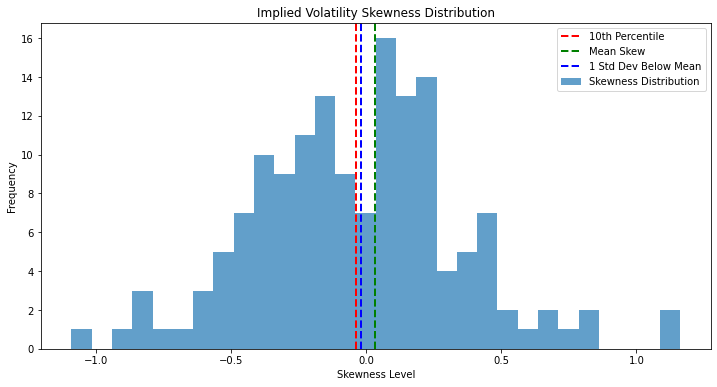

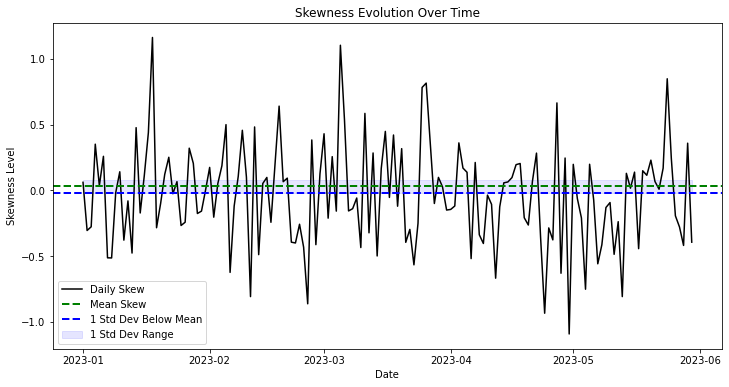

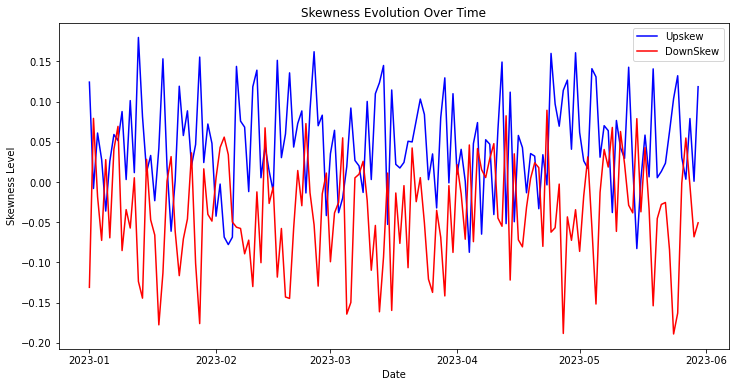

               1         3   6   9   12
average -0.045767 -0.043546 NaN NaN NaN
median  -0.041606 -0.048221 NaN NaN NaN


In [145]:
# Plot the skewness distribution and the calculated levels
plt.figure(figsize=(12, 6))
plt.hist(df['Skew'], bins=30, alpha=0.7, label='Skewness Distribution')
plt.axvline(skewness_levels['percentile_level'], color='red', linestyle='dashed', linewidth=2, label='10th Percentile')
plt.axvline(skewness_levels['mean_skew'], color='green', linestyle='dashed', linewidth=2, label='Mean Skew')
plt.axvline(skewness_levels['std_dev_level'], color='blue', linestyle='dashed', linewidth=2, label='1 Std Dev Below Mean')
plt.title('Implied Volatility Skewness Distribution')
plt.xlabel('Skewness Level')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the skewness evolution over time with the mean and standard deviation lines
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Skew'], label='Daily Skew', color='black')
plt.axhline(skewness_levels['mean_skew'], color='green', linestyle='dashed', linewidth=2, label='Mean Skew')
plt.axhline(skewness_levels['std_dev_level'], color='blue', linestyle='dashed', linewidth=2, label='1 Std Dev Below Mean')
plt.fill_between(df['Date'], skewness_levels['mean_skew'] - skewness_levels['std_dev_skew'], 
                 skewness_levels['mean_skew'] + skewness_levels['std_dev_skew'], color='blue', alpha=0.1, label='1 Std Dev Range')
plt.title('Skewness Evolution Over Time')
plt.xlabel('Date')
plt.ylabel('Skewness Level')
plt.legend()
plt.show()

# Plotting the evolution of skewness
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['UpSkew'], label='Upskew', color='blue')
plt.plot(df['Date'], df['DownSkew'], label='DownSkew', color='red')
plt.title('Skewness Evolution Over Time')
plt.xlabel('Date')
plt.ylabel('Skewness Level')
plt.legend()
plt.show()

print(vol_shifts)

### 2. Identify periods

#### Filter for Skew Levels

    Calculates skewness levels based on percentile and standard deviation.
    Categorizes periods into high, low, and average skew based on these levels.
    Filters and displays the periods for each skew category.
    The thresholds for high and low skew are set using the mean skew plus standard deviation level and the specific percentile level, respectively. This approach provides a nuanced view of market sentiment over time, classified into distinct skew categories.

In [146]:
# Sample data generation
df = pd.DataFrame({
    'IV_OTM_Put': np.random.normal(0.20, 0.05, 100),
    'IV_ATM': np.random.normal(0.18, 0.04, 100),
    'IV_OTM_Call': np.random.normal(0.22, 0.05, 100)
})

# Calculate skewness levels and categorize periods
skew_levels = calculate_skewness_levels(df, 'IV_OTM_Put', 'IV_OTM_Call', 'IV_ATM')
df = categorize_skew_periods(df, skew_levels)

# Filter for specific skew categories (e.g., High, Low, Average)
high_skew_periods = df[df['Skew_Category'] == 'High']
low_skew_periods = df[df['Skew_Category'] == 'Low']
average_skew_periods = df[df['Skew_Category'] == 'Average']

# Displaying the first few rows of each category
print("High Skew Periods:\n", high_skew_periods.head())
print("Low Skew Periods:\n", low_skew_periods.head())
print("Average Skew Periods:\n", average_skew_periods.head())

High Skew Periods:
    IV_OTM_Put    IV_ATM  IV_OTM_Call      Skew Skew_Category
0    0.266322  0.160697     0.265918  0.105423          High
1    0.251821  0.169676     0.225028  0.068748          High
2    0.267816  0.219152     0.238852  0.034182          High
3    0.180101  0.157454     0.245387  0.055290          High
8    0.263052  0.186909     0.188910  0.039073          High
Low Skew Periods:
     IV_OTM_Put    IV_ATM  IV_OTM_Call      Skew Skew_Category
15    0.152540  0.215843     0.165322 -0.056912           Low
21    0.196704  0.259354     0.199155 -0.061425           Low
25    0.147487  0.178887     0.146621 -0.031833           Low
36    0.154014  0.211785     0.174189 -0.047683           Low
53    0.124029  0.180885     0.197348 -0.020197           Low
Average Skew Periods:
     IV_OTM_Put    IV_ATM  IV_OTM_Call      Skew Skew_Category
4     0.222994  0.237010     0.289738  0.019355       Average
5     0.230028  0.209161     0.170577 -0.008859       Average
6     0.176045

### 3. Selecting strikes based on delta and moneyness 

- Delta-based strategies: select the strike prices of OTM put and call options that have deltas closest to the specified values (e.g., a 16 delta for a 1 standard deviation strangle). 
- Moneyness-based strategies: select strike prices at a specified distance from the current price of the underlying. This could be a percentage or a dollar amount which reflects a particular confidence interval or expected range of movement.

Delta: How much premium is expected to move per one unit move in the underlying asset. 

A 16 delta option, for example, would theoretically have a 16% chance of expiring in-the-money.

Moneyness: How far they are from the current price of the underlying asset, typically expressed as a percentage. 

A call strike that is 5% above the current price and a put strike that is 5% below the current price.

In [151]:
def select_delta_based_strikes(option_chain, target_delta):
    """
    Select strike prices for call and put options based on target deltas.

    :param option_chain: DataFrame containing option chain data with deltas.
    :param target_delta: The target delta value for the strategy.
    :return: Dictionary with selected put and call strike prices.
    """
    # Find the call and put options with deltas closest to the target delta
    call_strike = option_chain[(option_chain['Type'] == 'call') & 
                               (option_chain['Delta'] >= target_delta)].iloc[0]['Strike']
    put_strike = option_chain[(option_chain['Type'] == 'put') & 
                              (option_chain['Delta'] <= -target_delta)].iloc[-1]['Strike']

    return {'Call Strike': call_strike, 'Put Strike': put_strike}

def select_moneyness_based_strikes(current_price, percentage_above, percentage_below):
    """
    Select strike prices for call and put options based on moneyness.

    :param current_price: The current price of the underlying asset.
    :param percentage_above: The percentage above the current price for the call option.
    :param percentage_below: The percentage below the current price for the put option.
    :return: Dictionary with selected put and call strike prices.
    """
    call_strike = current_price * (1 + percentage_above / 100)
    put_strike = current_price * (1 - percentage_below / 100)

    return {'Call Strike': call_strike, 'Put Strike': put_strike}

In practice, you would need access to a real-time or historical options chain data source that includes delta values for each option. You would then use these functions to iterate over the option chain for each period you're analyzing to select the appropriate strike prices for your strangle strategy.

Remember that these are simplified examples. The actual implementation would need to account for the availability of specific strike prices, bid-ask spreads, and possibly adjusting the target deltas based on liquidity or other market factors

### 4. Simulate Strangle Positions
    - For each qualifying period, simulate the purchase of a put and a call with the selected deltas or moneyness levels. Ensure the options have the same expiration date.
    - Record the premiums paid for both legs of the strangle